In [1]:
import os
import pandas as pd
import sys

In [2]:
sys.path.append(os.path.abspath('../..'))

In [3]:
from analysis.preprocessing import load_and_clean_heat_data

In [4]:
df = load_and_clean_heat_data()
df

,Entity,Code,Year,ocean_heat_content_noaa_2000m,ocean_heat_content_mri_2000m,ocean_heat_content_iap_2000m
0,World,OWID_WRL,1955,NaN,-14.032666,-10.506033
1,World,OWID_WRL,1956,NaN,-11.862667,-10.054033
2,World,OWID_WRL,1957,-10.169267,-13.632667,-10.476033
3,World,OWID_WRL,1958,-8.925266,-9.962666,-4.879034
4,World,OWID_WRL,1959,-9.579267,-11.782666,-7.605033
...,...,...,...,...,...,...
65,World,OWID_WRL,2020,25.525000,29.277334,29.420967
66,World,OWID_WRL,2021,27.280000,NaN,NaN
67,World,OWID_WRL,2022,28.192000,NaN,NaN
68,World,OWID_WRL,2023,29.220000,NaN,NaN


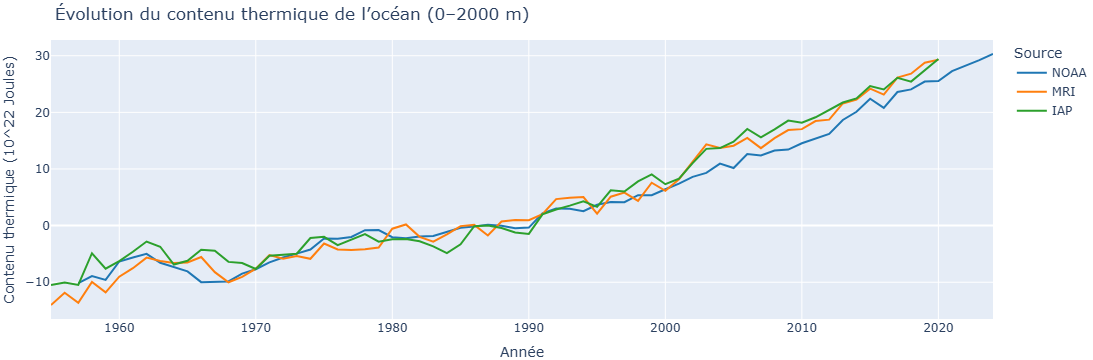

In [ ]:
import plotly.express as px

# Transformer le DataFrame en format long
df_melted = df.melt(
    id_vars="Day",
    value_vars=[
        "sea_level_church_and_white_2011",
        "sea_level_uhslc",
        "sea_level_average"
    ],
    var_name="Source",
    value_name="Sea_Level"
)

# Renommer les sources pour la légende
name_map = {
    "sea_level_church_and_white_2011": "Church & White (2011)",
    "sea_level_uhslc": "UH Sea Level Center",
    "sea_level_average": "Moyenne"
}
df_melted["Source"] = df_melted["Source"].map(name_map)

# Palette de couleurs personnalisée (optionnelle)
color_map = {
    "Church & White (2011)": "#1f77b4",  # bleu
    "UH Sea Level Center": "#ff7f0e",    # orange
    "Moyenne": "#2ca02c"                 # vert
}

# Tracer le graphique
fig = px.line(
    df_melted,
    x="Day",
    y="Sea_Level",
    color="Source",
    color_discrete_map=color_map,
    title="Évolution du niveau moyen de la mer (1980–2023)",
    labels={
        "Sea_Level": "Niveau de la mer (mm)",
        "Day": "Année"
    }
)

# Mise en forme
fig.update_layout(
    legend_title_text="Source des données",
    margin={"r":0, "t":60, "l":0, "b":0},
    template="plotly_white"
)

fig.show()
